In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
collision_data = pd.read_csv("no-missing-data.csv")

In [3]:
collision_data.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


**severity count**

In [18]:
collision_data.loc[0]

SEVERITYCODE                                                     2
X                                                      -122.323148
Y                                                         47.70314
STATUS                                                     Matched
ADDRTYPE                                              Intersection
LOCATION                                5TH AVE NE AND NE 103RD ST
SEVERITYDESC                                      Injury Collision
COLLISIONTYPE                                               Angles
PERSONCOUNT                                                      2
PEDCOUNT                                                         0
PEDCYLCOUNT                                                      0
VEHCOUNT                                                         2
INCDATE                                     2013/03/27 00:00:00+00
INCDTTM                                       3/27/2013 2:54:00 PM
JUNCTIONTYPE                At Intersection (intersection rela

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

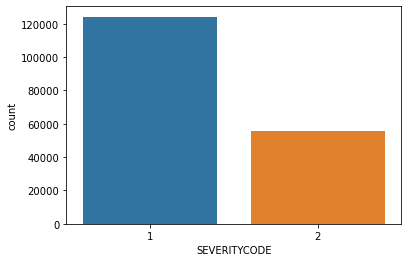

In [4]:
sns.countplot(data=collision_data, x="SEVERITYCODE")

In [6]:
!pip install geopy

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="imb-capstone-proj")
location = geolocator.reverse("47.545739, -122.306426")
print(location)

6362, Swift Avenue South, Holly Park, Rainier Valley, Seattle, King County, Washington, 98108, United States


In [20]:
def returnLocation(y,x) :
    cord_str = f"{y}, {x}"
    location = geolocator.reverse(cord_str)
    return location

In [ ]:
collision_data.apply(lambda row : returnLocation(row.Y, row.X), axis=1)